<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Get-all-schools-data" data-toc-modified-id="Get-all-schools-data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Get all schools data</a></span></li><li><span><a href="#filter-only-injured-(injury_severity-!=-0)" data-toc-modified-id="filter-only-injured-(injury_severity-!=-0)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>filter only injured (injury_severity != 0)</a></span></li><li><span><a href="#filter-until-31-05-2020" data-toc-modified-id="filter-until-31-05-2020-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>filter until 31-05-2020</a></span></li><li><span><a href="#Filter-only-school_id-=-541896--ישיבת-פוניבז'" data-toc-modified-id="Filter-only-school_id-=-541896--ישיבת-פוניבז'-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Filter only school_id = 541896  ישיבת פוניבז'</a></span></li><li><span><a href="#count-total" data-toc-modified-id="count-total-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>count total</a></span></li><li><span><a href="#plot-over-years" data-toc-modified-id="plot-over-years-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>plot over years</a></span></li><li><span><a href="#split-per-injured-type" data-toc-modified-id="split-per-injured-type-0.7"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>split per injured type</a></span></li><li><span><a href="#split-per-vehicle-type" data-toc-modified-id="split-per-vehicle-type-0.8"><span class="toc-item-num">0.8&nbsp;&nbsp;</span>split per vehicle type</a></span></li><li><span><a href="#count-per-injury-severity" data-toc-modified-id="count-per-injury-severity-0.9"><span class="toc-item-num">0.9&nbsp;&nbsp;</span>count per injury severity</a></span></li><li><span><a href="#compare-to-yishuv" data-toc-modified-id="compare-to-yishuv-0.10"><span class="toc-item-num">0.10&nbsp;&nbsp;</span>compare to yishuv</a></span></li><li><span><a href="#speed-around-school" data-toc-modified-id="speed-around-school-0.11"><span class="toc-item-num">0.11&nbsp;&nbsp;</span>speed around school</a></span></li><li><span><a href="#cross?" data-toc-modified-id="cross?-0.12"><span class="toc-item-num">0.12&nbsp;&nbsp;</span>cross?</a></span></li></ul></li><li><span><a href="#Draft" data-toc-modified-id="Draft-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Draft</a></span><ul class="toc-item"><li><span><a href="#filter-only-pedastrians" data-toc-modified-id="filter-only-pedastrians-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>filter only pedastrians</a></span></li></ul></li></ul></div>

### Get all schools data

In [79]:
import pandas as pd
from collections import defaultdict
import seaborn as sns ; sns.set()

In [3]:
import os

In [4]:
df = pd.DataFrame()

In [5]:
li = []

for i, filename in enumerate(os.listdir('schools_data')):
    if i % 100 == 0:
        print(i)
    df = pd.read_csv(os.path.join('schools_data', filename), index_col=None, header=0)
    li.append(df)

total_df = pd.concat(li, axis=0, ignore_index=True)
total_df['accident_timestamp'] = pd.to_datetime(total_df.accident_timestamp.values)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500


In [6]:
#total_df_orig = total_df.copy()

In [151]:
school_id = 541896

### filter only injured (injury_severity != 0)

In [152]:
total_df = total_df.loc[total_df.injury_severity != 0]

### filter until 31-05-2020

In [153]:
total_df = total_df.loc[(total_df.accident_timestamp <= pd.Timestamp('2020-05-31'))&(total_df.accident_timestamp >= pd.Timestamp('2015-01-01'))]

### Filter only school_id = 541896  ישיבת פוניבז'

In [154]:
school_df = total_df.loc[total_df.school_id == school_id]

### count total

In [155]:
school_df.groupby('accident_year').size()

accident_year
2015    45
2016    25
2017    39
2018    39
2019    30
2020    11
dtype: int64

In [156]:
total_injured = school_df.loc[school_df.accident_year >= 2015].groupby('accident_year').size().sum()
total_injured

189

### plot over years

In [157]:
school_df.accident_timestamp.max()

Timestamp('2020-05-27 13:00:00')

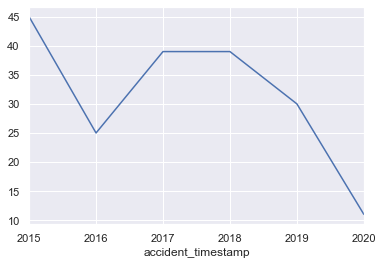

In [158]:
school_df.set_index('accident_timestamp').groupby(pd.Grouper(freq="Y")).size().plot()

In [159]:
school_df.accident_severity.unique()

array([3, 2], dtype=object)

In [160]:
yearly = school_df.groupby(['accident_year', 'accident_severity_hebrew']).size().unstack().fillna(0).stack().rename('count').to_frame().reset_index()

In [161]:
yearly

,accident_year,accident_severity_hebrew,count
0,2015,קלה,41.0
1,2015,קשה,4.0
2,2016,קלה,23.0
3,2016,קשה,2.0
4,2017,קלה,36.0
5,2017,קשה,3.0
6,2018,קלה,37.0
7,2018,קשה,2.0
8,2019,קלה,27.0
9,2019,קשה,3.0


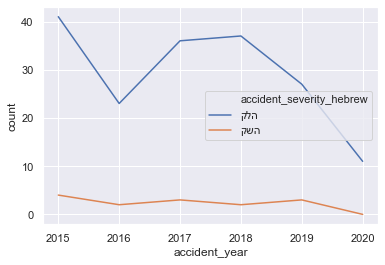

In [162]:
sns.lineplot(x="accident_year", y="count", hue="accident_severity_hebrew",
            data=yearly)

### split per injured type

In [163]:
school_df.groupby(['injured_type_hebrew', 'injured_type']).size()

injured_type_hebrew            injured_type
הולך רגל                       1               122
נהג - אופנוע                   4                 3
נהג - אופניים                  6                10
נהג - רכב בעל 4 גלגלים ויותר   2                 4
נהג - רכב לא ידוע              8                 7
נוסע - רכב בעל 4 גלגלים ויותר  3                43
dtype: int64

In [164]:
school_df[school_df.injured_type == 8]

,Unnamed: 0,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,...,vehicle_vehicle_type_hebrew,vehicle_damage,vehicle_damage_hebrew,road_segment_number,school_id,school_type,school_name,school_yishuv_name,school_longitude,school_latitude
122452,29,2017074199,12017074199,1,NaN,2,נהג נפגע,0,4,15-19,...,אופניים חשמליים,1.0,קל,NaN,541896,בית ספר,ישיבת פוניבז',בני ברק,34.837081,32.08253
122455,32,2019011250,12019011250,1,NaN,2,נהג נפגע,0,3,10-14,...,אחר ולא ידוע,4.0,אין נזק,NaN,541896,בית ספר,ישיבת פוניבז',בני ברק,34.837081,32.08253
122475,52,2018084060,32018084060,3,NaN,2,נהג נפגע,0,4,15-19,...,אופניים חשמליים,0.0,לא ידוע,NaN,541896,בית ספר,ישיבת פוניבז',בני ברק,34.837081,32.08253
122490,67,2015055808,32015055808,3,NaN,2,נהג נפגע,0,4,15-19,...,אופניים חשמליים,0.0,לא ידוע,NaN,541896,בית ספר,ישיבת פוניבז',בני ברק,34.837081,32.08253
122547,124,2019069676,12019069676,1,NaN,2,נהג נפגע,0,3,10-14,...,אופניים חשמליים,1.0,קל,NaN,541896,בית ספר,ישיבת פוניבז',בני ברק,34.837081,32.08253
122586,163,2017096151,32017096151,3,NaN,2,נהג נפגע,0,4,15-19,...,אופניים חשמליים,4.0,אין נזק,NaN,541896,בית ספר,ישיבת פוניבז',בני ברק,34.837081,32.08253
122626,203,2019040784,32019040784,3,NaN,2,נהג נפגע,0,4,15-19,...,קורקינט חשמלי,4.0,אין נזק,NaN,541896,בית ספר,ישיבת פוניבז',בני ברק,34.837081,32.08253


### split per vehicle type

In [165]:
school_df.groupby(['involve_vehicle_type_hebrew', 'injured_type_hebrew']).size().to_frame()

0
involve_vehicle_type_hebrew      injured_type_hebrew              
אוטובוס                          נוסע - רכב בעל 4 גלגלים ויותר  21
אופנוע 51 עד 125 סמ"ק            נהג - אופנוע                    3
אופניים                          נהג - אופניים                  10
אופניים חשמליים                  נהג - רכב לא ידוע               5
אחר ולא ידוע                     נהג - רכב לא ידוע               1
מונית                            נוסע - רכב בעל 4 גלגלים ויותר   1
משא עד 3.5  טון - לא אחוד (טנדר) נהג - רכב בעל 4 גלגלים ויותר    1
משא עד 3.5 טון - אחוד (טרנזיט)   נהג - רכב בעל 4 גלגלים ויותר    1
                                 נוסע - רכב בעל 4 גלגלים ויותר   4
קורקינט חשמלי                    נהג - רכב לא ידוע               1
רכב נוסעים פרטי                  נהג - רכב בעל 4 גלגלים ויותר    2
                                 נוסע - רכב בעל 4 גלגלים ויותר  17

### count per injury severity

In [166]:
school_df.groupby('injury_severity').size()

injury_severity
2     13
3    176
dtype: int64

### compare to yishuv

In [170]:
school_df.columns

Index(['Unnamed: 0', 'accident_id', 'provider_and_id', 'provider_code',
       'file_type_police', 'involved_type', 'involved_type_hebrew',
       'license_acquiring_date', 'age_group', 'age_group_hebrew',
       ...
       'vehicle_vehicle_type_hebrew', 'vehicle_damage',
       'vehicle_damage_hebrew', 'road_segment_number', 'school_id',
       'school_type', 'school_name', 'school_yishuv_name', 'school_longitude',
       'school_latitude'],
      dtype='object', length=163)

In [174]:
yishuv_df = total_df.loc[total_df.school_yishuv_name == school_df.school_yishuv_name.values[0]]

In [183]:
yishuv_rank = yishuv_df.groupby(['school_name', 'injury_severity_hebrew']).size().rename('injured_count').to_frame().unstack().fillna(0)

In [186]:
yishuv_rank['rank'] = yishuv_rank[('injured_count', 'הרוג')] + yishuv_rank[('injured_count', 'פצוע קשה')] + yishuv_rank[('injured_count', 'פצוע קל')]

In [189]:
yishuv_rank.sort_values('rank')

injured_count                    rank
injury_severity_hebrew          הרוג פצוע קל פצוע קשה       
school_name                                                 
ישיבה תיכונית                    0.0    34.0      4.0   38.0
ת""ת איש מצליח                   0.0    39.0      0.0   39.0
ת""ת אהלי אברהם                  0.0    36.0      3.0   39.0
אולפנת נווה שרה הרצוג            0.0    36.0      4.0   40.0
שתילים                           0.0    37.0      4.0   41.0
...                              ...     ...      ...    ...
תלמוד תורה בני-מנחם              0.0   178.0      8.0  186.0
ישיבת פוניבז'                    0.0   176.0     13.0  189.0
כתב סופר                         0.0   185.0     12.0  197.0
מוסדות חסידי בעלזא               0.0   318.0     12.0  330.0
ישיבת חזון נחום                  0.0   417.0     26.0  443.0

[182 rows x 4 columns]

### speed around school

In [204]:
school_df.groupby('speed_limit_hebrew').size()

speed_limit_hebrew
לא ידוע        84
עד 50 קמ"ש    105
dtype: int64

In [212]:
school_df.groupby(['street1_hebrew', 'speed_limit_hebrew']).size().rename('count').to_frame().iloc[0:60]

count
street1_hebrew   speed_limit_hebrew       
אהרונוביץ ראובן  עד 50 קמ"ש              1
אלישע            לא ידוע                 2
                 עד 50 קמ"ש              2
אשל אברהם        לא ידוע                 3
                 עד 50 קמ"ש              3
בעל שם טוב       עד 50 קמ"ש              1
גבורי ישראל      עד 50 קמ"ש              1
דבורה הנביאה     לא ידוע                 2
                 עד 50 קמ"ש              1
האדמו"ר מגור     לא ידוע                 2
האדמו"ר מראדזמין לא ידוע                 1
הרב בן יעקב      לא ידוע                 1
                 עד 50 קמ"ש              4
הרב דסלר         עד 50 קמ"ש              2
הרב הירש         עד 50 קמ"ש              1
הרב וסרמן אלחנן  עד 50 קמ"ש              1
הרב ורנר         עד 50 קמ"ש              1
הרב כהן שלמה     עד 50 קמ"ש              1
הרב כהנמן        לא ידוע                12
                 עד 50 קמ"ש              6
הרב סורוצקין     עד 50 קמ"ש              1
הרב פוברסקי      לא ידוע                 1
                 עד 50 קמ"ש              1
הרב קוטלר        עד 50 קמ"ש              2
הרב רוזובסקי     לא ידוע                 1
הרב שך           לא ידוע                 3
                 עד 50 קמ"ש              2
חזון איש         לא ידוע                22
                 עד 50 קמ"ש             16
יהודה הלוי       לא ידוע                 2
יונה הנביא       לא ידוע                 1
                 עד 50 קמ"ש              1
ישמח משה         לא ידוע                 1
                 עד 50 קמ"ש              1
ככר התעשיה       עד 50 קמ"ש              1
לנדא יעקב        לא ידוע                 1
                 עד 50 קמ"ש              3
מהרש"ל           לא ידוע                 1
                 עד 50 קמ"ש              3
מחזיקי הדת       לא ידוע                 1
נחום             עד 50 קמ"ש              1
נחמיה            לא ידוע                 2
                 עד 50 קמ"ש              2
סוקולוב          עד 50 קמ"ש              3
סעדיה גאון       עד 50 קמ"ש              6
עזרא             לא ידוע                 3
                 עד 50 קמ"ש              9
קדושת יום טוב    לא ידוע                 2
                 עד 50 קמ"ש              1
רבי אבא          לא ידוע                 1
רבי עקיבא        לא ידוע                11
                 עד 50 קמ"ש             21
רבנו תם          לא ידוע                 1
רוזנהיים         לא ידוע                 1
                 עד 50 קמ"ש              1
רש"י             לא ידוע                 2
                 עד 50 קמ"ש              1
שלמה המלך        לא ידוע                 3
                 עד 50 קמ"ש              1
שמעון הצדיק      עד 50 קמ"ש              2

### cross?

In [197]:
list(school_df.columns)

['Unnamed: 0',
 'accident_id',
 'provider_and_id',
 'provider_code',
 'file_type_police',
 'involved_type',
 'involved_type_hebrew',
 'license_acquiring_date',
 'age_group',
 'age_group_hebrew',
 'sex',
 'sex_hebrew',
 'involve_vehicle_type',
 'involve_vehicle_type_hebrew',
 'safety_measures',
 'safety_measures_hebrew',
 'involve_yishuv_symbol',
 'involve_yishuv_name',
 'injury_severity',
 'injury_severity_hebrew',
 'injured_type',
 'injured_type_hebrew',
 'injured_position',
 'injured_position_hebrew',
 'population_type',
 'population_type_hebrew',
 'involve_home_region',
 'involve_home_region_hebrew',
 'involve_home_district',
 'involve_home_district_hebrew',
 'involve_home_natural_area',
 'involve_home_natural_area_hebrew',
 'involve_home_municipal_status',
 'involve_home_municipal_status_hebrew',
 'involve_home_yishuv_shape',
 'involve_home_yishuv_shape_hebrew',
 'hospital_time',
 'hospital_time_hebrew',
 'medical_type',
 'medical_type_hebrew',
 'release_dest',
 'release_dest_hebre

In [200]:
school_df.groupby('cross_location_hebrew').size()

cross_location_hebrew
במעבר חצייה בלי רמזור         44
במעבר חצייה עם רמזור          12
לא במעבר חצייה לא ליד צומת    13
לא במעבר חצייה ליד צומת        2
לא ידוע מקום חצייה             3
dtype: int64

In [202]:
school_df[school_df.injured_type == 1].groupby('cross_location').size()

cross_location
0    48
1     2
2    13
3    44
4    12
9     3
dtype: int64

###

In [126]:
pedastrians_df = school_df.loc[school_df.injured_type == 1]

In [130]:
pedastrians_df.groupby('accident_year').size()

accident_year
2015    35
2016    20
2017    28
2018    11
2019    22
2020     6
dtype: int64

In [127]:
pedastrians_df.shape

(122, 163)

In [30]:
pedastrians_df.accident_timestamp.max()

Timestamp('2020-06-24 13:30:00')

123

## Draft

### filter only pedastrians

In [212]:
filter_pedastrians = False
if filter_pedastrians == True:
    total_df = total_df.loc[total_df.injured_type == 1]

In [213]:
total_df.shape

(125690, 163)

In [214]:
schools_df = total_df.loc[total_df.school_type == 'בית ספר']

In [215]:
schools_df.accident_timestamp.head()

0   2016-02-15 17:00:00
1   2017-11-28 16:45:00
2   2018-03-19 07:45:00
3   2018-12-30 00:30:00
4   2019-09-22 11:30:00
Name: accident_timestamp, dtype: datetime64[ns]

In [216]:
analysis = defaultdict(dict)

for school_id in schools_df.school_id.unique():
    school_df = schools_df.loc[schools_df.school_id == school_id]
    df_2019_2020 = school_df.loc[(school_df.accident_timestamp >= pd.Timestamp('2019-06-01')) & (school_df.accident_timestamp <= pd.Timestamp('2020-05-31'))]
    df_2018_2019 = school_df.loc[(school_df.accident_timestamp >= pd.Timestamp('2018-06-01')) & (school_df.accident_timestamp <= pd.Timestamp('2019-05-31'))]
    analysis[school_id]['total_19_20'] = df_2019_2020.shape[0]
    analysis[school_id]['total_18_19'] = df_2018_2019.shape[0]
    analysis[school_id]['total_diff'] = df_2019_2020.shape[0] - df_2018_2019.shape[0]
analysis = pd.DataFrame(analysis).T

In [217]:
analysis.sort_values('total_diff', inplace=True)

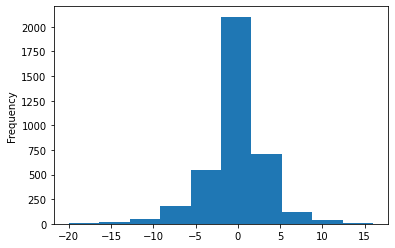

In [218]:
analysis.total_diff.plot.hist()

In [219]:
analysis.total_diff.mean()

-0.42845786963434024

In [221]:
analysis.total_diff.std()

3.6100025815726746

In [222]:
largest_diff_schools = analysis.iloc[-10:].index.values[::-1]

In [223]:
smallest_diff_schools = analysis.iloc[:10].index.values

In [224]:
for school_id in largest_diff_schools:
    print(school_id)
    school_df = schools_df.loc[schools_df.school_id == school_id]
    print(school_df.school_name.unique())
    print(school_df.school_yishuv_name.unique())
    print(analysis.loc[school_id])
    

512103
['ב""י אוהלי אליעזר']
['בני ברק']
total_19_20    27
total_18_19    11
total_diff     16
Name: 512103, dtype: int64
610162
['ארלוזורוב']
['אשקלון']
total_19_20    20
total_18_19     5
total_diff     15
Name: 610162, dtype: int64
510156
['מקור חיים מד']
['בני ברק']
total_19_20    25
total_18_19    11
total_diff     14
Name: 510156, dtype: int64
641183
['ישיבת צביה אשקלון']
['אשקלון']
total_19_20    17
total_18_19     3
total_diff     14
Name: 641183, dtype: int64
514109
['ת""ת אור דוד']
['בני ברק']
total_19_20    26
total_18_19    12
total_diff     14
Name: 514109, dtype: int64
610196
['עוזיאל']
['אשקלון']
total_19_20    16
total_18_19     2
total_diff     14
Name: 610196, dtype: int64
614693
['שובו ניצנים-מעורב']
['אשקלון']
total_19_20    17
total_18_19     4
total_diff     13
Name: 614693, dtype: int64
544692
['מקיף דתי כרם שלמה']
['חולון']
total_19_20    14
total_18_19     2
total_diff     12
Name: 544692, dtype: int64
640128
['מקיף א כללי']
['אשדוד']
total_19_20    16
total_18

In [226]:
for school_id in smallest_diff_schools:
    print(school_id)
    school_df = schools_df.loc[schools_df.school_id == school_id]
    print(school_df.school_name.unique())
    print(school_df.school_yishuv_name.unique())
    print(analysis.loc[school_id])
    

614404
['כוכב הצפון']
['אשקלון']
total_19_20     6
total_18_19    26
total_diff    -20
Name: 614404, dtype: int64
610097
['גאולים']
['אשדוד']
total_19_20     1
total_18_19    20
total_diff    -19
Name: 610097, dtype: int64
513499
['ת""ת זיו התורה']
['בני ברק']
total_19_20    13
total_18_19    31
total_diff    -18
Name: 513499, dtype: int64
615112
['בי""ס לבנות ב""י אידי']
['אשדוד']
total_19_20     3
total_18_19    21
total_diff    -18
Name: 615112, dtype: int64
670323
['מרכז חנוך משיבי חיים']
['אשדוד']
total_19_20     1
total_18_19    18
total_diff    -17
Name: 670323, dtype: int64
571224
['תיכון חדש דרכא']
['בת ים']
total_19_20     6
total_18_19    23
total_diff    -17
Name: 571224, dtype: int64
514281
['ת""ת פרי חדש']
['בני ברק']
total_19_20    15
total_18_19    32
total_diff    -17
Name: 514281, dtype: int64
513101
['בן גוריון']
['בת ים']
total_19_20     8
total_18_19    24
total_diff    -16
Name: 513101, dtype: int64
540674
['ישיבת ב""ע אדרת']
['בת ים']
total_19_20     6
total_18_1

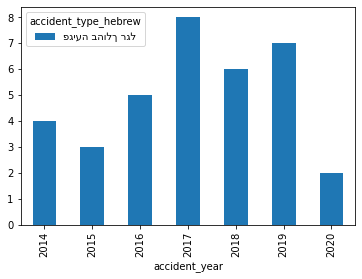

In [179]:
schools_df.loc[schools_df.school_id == 520023].groupby(['accident_year', 'accident_type_hebrew']).size().rename('count').unstack().fillna(0).plot.bar()

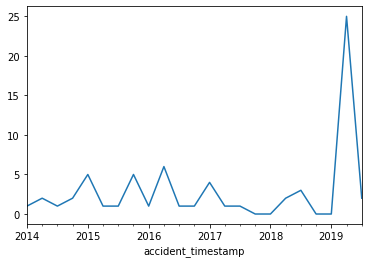

In [228]:
sdf = schools_df.loc[schools_df.school_id == 614404, ['accident_timestamp', 'accident_severity']]
sdf.set_index('accident_timestamp').groupby(pd.Grouper(freq="Q")).size().plot()

In [238]:
schools_df.loc[schools_df.school_id == 610162].groupby(['street1_hebrew', 'accident_year', 'accident_month']).size().to_frame()

0
street1_hebrew accident_year accident_month   
ביאליק         2014          9               1
                             10              1
                             11              1
                             12              1
               2015          6               1
                             11              1
               2016          3               1
                             11              1
                             12              1
               2017          2               1
               2018          1               1
                             2               1
                             3               1
               2019          7               1
                             9               1
                             10              1
                             11              4
               2020          6               1
ברגסון         2014          1               1
הארי           2014          3               1
               2018          5               1
ההסתדרות       2014          9               1
                             11              1
               2015          8               2
                             12              1
               2016          8               1
               2018          2               1
                             7               2
               2019          7               1
                             8               1
                             10              1
ז'בוטינסקי     2017          8               1
חתם סופר       2018          9               1
יהודה הלוי     2014          9               1
               2016          3               1
               2017          4               1
               2018          1               1
יוספטל         2017          5               1
סמולנסקין      2018          4               1
עגנון          2014          1               1
               2015          9               1
               2018          1               1
פרץ י ל        2016          3               1
צור אפרים      2020          3               1
שד בן גוריון   2014          8               1
               2016          2               5
                             6               1
               2018          2               1
               2019          3               1
                             4               1
                             6               2
שפינוזה        2019          7               7